DAT340, Assignment 5

*Redacted due to web crawlers*

# Introduction

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGenerator = ImageDataGenerator(rescale=1.0 / 255.0)

imgdir = "data"
seed = 12345

imgSize = 64
batchSize = 32

trainGenerator = dataGenerator.flow_from_directory(
    imgdir + "/train",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)

validationGenerator = dataGenerator.flow_from_directory(
    imgdir + "/validation",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)


Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


# Part 1

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D


def make_convnet(width: int, height: int, channels: int) -> Model:
    model = Sequential([
        Conv2D(
            32,
            kernel_size=(5, 5),
            strides=(1, 1),
            activation="relu",
            input_shape=(width, height, channels)
        ), MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2)
        ), Conv2D(
            64,
            (5, 5),
            activation="relu"
        ), MaxPooling2D(
            pool_size=(2, 2)
        ), Flatten(
        ), Dense(
            1000,
            activation="relu"
        ), Dense(
            1,
            activation="sigmoid"
        ),
    ])

    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )

    return model


In [5]:
cnn = make_convnet(imgSize, imgSize, 3)

fitInfos = cnn.fit(
    trainGenerator,
    verbose=1,
    steps_per_epoch=50,  # trainCount / batchSize = 1600 / 32 = 50
    validation_steps=18,  # testCount / batchSize = 576 / 32 = 18
    validation_data=validationGenerator,
    epochs=20,
    use_multiprocessing=True
)


Epoch 1/20
50/50 [==============================] - 219s 4s/step - loss: 0.6376 - accuracy: 0.6469 - val_loss: 0.5823 - val_accuracy: 0.7153
Epoch 2/20
50/50 [==============================] - 11s 212ms/step - loss: 0.5542 - accuracy: 0.7225 - val_loss: 0.5373 - val_accuracy: 0.7483
Epoch 3/20
50/50 [==============================] - 11s 214ms/step - loss: 0.4592 - accuracy: 0.7887 - val_loss: 0.4938 - val_accuracy: 0.7674
Epoch 4/20
50/50 [==============================] - 11s 216ms/step - loss: 0.3932 - accuracy: 0.8238 - val_loss: 0.4810 - val_accuracy: 0.7917
Epoch 5/20
50/50 [==============================] - 11s 214ms/step - loss: 0.3326 - accuracy: 0.8606 - val_loss: 0.4994 - val_accuracy: 0.7830
Epoch 6/20
50/50 [==============================] - 13s 250ms/step - loss: 0.2863 - accuracy: 0.8869 - val_loss: 0.5180 - val_accuracy: 0.7812
Epoch 7/20
50/50 [==============================] - 10s 207ms/step - loss: 0.2091 - accuracy: 0.9200 - val_loss: 0.6216 - val_accuracy: 0.7604
E

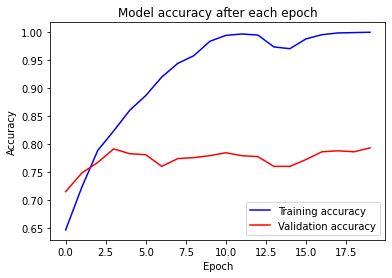

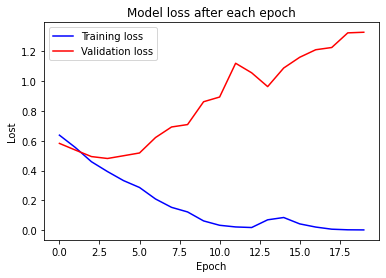

In [6]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fitInfos.epoch, fitInfos.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fitInfos.epoch, fitInfos.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()

plt.xlabel("Epoch")
plt.ylabel("Lost")
plt.title("Model loss after each epoch")
plt.plot(fitInfos.epoch, fitInfos.history["loss"], color="blue", label="Training loss")
plt.plot(fitInfos.epoch, fitInfos.history["val_loss"], color="red", label="Validation loss")
plt.legend()
plt.show()


We can see a clear case of overfitting here. The training accuracy of the model increases and tends to 1, while the validation accuracy only improve during the first epochs, then quickly converges to 0.75 . This overfitting could have been avoided using fairly agressive early stopping, but the goal here is to highlight this overfitting.


# Part 2

In [3]:
augmentedDataGenerator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True
)

augmentedTrainGenerator = augmentedDataGenerator.flow_from_directory(
    imgdir + "/train",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)

validationGenerator = dataGenerator.flow_from_directory(
    imgdir + "/validation",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)


Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [4]:
cnn = make_convnet(imgSize, imgSize, 3)

fitInfosAugmented = cnn.fit(
    augmentedTrainGenerator,
    verbose=1,
    steps_per_epoch=50,
    validation_steps=18,
    validation_data=validationGenerator,
    epochs=20,
    use_multiprocessing=True
)


Epoch 1/20
50/50 [==============================] - 15s 239ms/step - loss: 0.6872 - accuracy: 0.5944 - val_loss: 0.6270 - val_accuracy: 0.6771
Epoch 2/20
50/50 [==============================] - 14s 273ms/step - loss: 0.5880 - accuracy: 0.7063 - val_loss: 0.5618 - val_accuracy: 0.7344
Epoch 3/20
50/50 [==============================] - 18s 366ms/step - loss: 0.5522 - accuracy: 0.7212 - val_loss: 0.5902 - val_accuracy: 0.6823
Epoch 4/20
50/50 [==============================] - 17s 334ms/step - loss: 0.5120 - accuracy: 0.7600 - val_loss: 0.5458 - val_accuracy: 0.7396
Epoch 5/20
50/50 [==============================] - 13s 264ms/step - loss: 0.4888 - accuracy: 0.7669 - val_loss: 0.4931 - val_accuracy: 0.7795
Epoch 6/20
50/50 [==============================] - 13s 260ms/step - loss: 0.4781 - accuracy: 0.7744 - val_loss: 0.5107 - val_accuracy: 0.7344
Epoch 7/20
50/50 [==============================] - 13s 261ms/step - loss: 0.4539 - accuracy: 0.7931 - val_loss: 0.4551 - val_accuracy: 0.7934

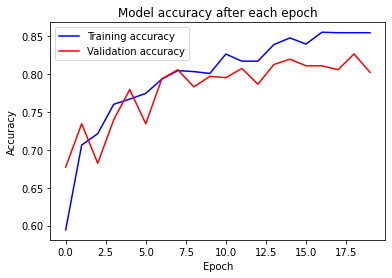

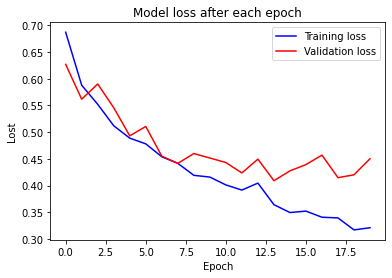

In [6]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()

plt.xlabel("Epoch")
plt.ylabel("Lost")
plt.title("Model loss after each epoch")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["loss"], color="blue", label="Training loss")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["val_loss"], color="red", label="Validation loss")
plt.legend()
plt.show()


Here, the validation accuracy gets better than before, because the overfitting is less important. The validation accuracy is more or less following the training accuracy, slowly getting to 1. Still, it is not optimal, and we could surely tweak further the hyperparameters to find an even better configuration, as right now we chose a fairly conservative augmentation.


# Part 2 - interlude

jeep: 92.1%
snowplow: 2.4%
golfcart: 1.4%
pickup: 1.3%
half_track: 0.5%


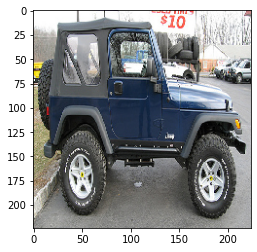

In [17]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggModel = applications.VGG16(weights="imagenet", include_top=True)

# The VGG model uses a 224x224 image
img = load_img(imgdir + "/validation/car/0000.jpg", target_size=(224, 224))
imgArray = img_to_array(img)
imgVGG = preprocess_input(imgArray)
imgVGG = imgVGG.reshape(1, 224, 224, 3)
preds = decode_predictions(vggModel.predict(imgVGG))

plt.imshow(img)

print("\n".join([f"{pred[1]}: {round(pred[2] * 1000) / 10}%" for pred in preds[0]]))


The model clearly predicts that the selected image is a jeep, with a confidence of 92.1 %. Moreover, the other possible labels are all near zero, which really shows that, for the VGG model, this is a jeep.


# Part 3

In [22]:
import numpy as np

featureExtractor = applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(imgSize, imgSize, 3)
)

vggDataGenerator = ImageDataGenerator(preprocessing_function=preprocess_input)


def create_vgg16_features(directory: str) -> None:
    generator = vggDataGenerator.flow_from_directory(
        imgdir + '/' + directory,
        target_size=(imgSize, imgSize),
        batch_size=batchSize,
        shuffle=False
    )

    cnnFeatures = featureExtractor.predict(
        generator,
        verbose=1
    )

    with open("vgg16_" + directory, "wb") as f:
        np.save(f, cnnFeatures)


create_vgg16_features("train")
create_vgg16_features("validation")


Found 1600 images belonging to 2 classes.
50/50 [==============================] - 7s 137ms/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 2s 131ms/step


In [25]:
def get_labels(n):
    return np.array([0] * (n // 2) + [1] * (n // 2))


def train_on_cnnfeatures():
    with open("vgg16_train", "rb") as f:
        trainData = np.load(f)

    with open("vgg16_validation", "rb") as f:
        validationData = np.load(f)

    vggModel = Sequential([
        Flatten(),
        Dense(
            128,
            activation="relu"
        ), Dense(
            1,
            activation="sigmoid"
        )
    ])

    vggModel.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    fitInfos = vggModel.fit(
        trainData,
        get_labels(1600),
        epochs=20,
        validation_data=[validationData, get_labels(576)],
        steps_per_epoch=50,
        validation_steps=18,
        verbose=1
    )

    return fitInfos, vggModel


In [26]:
fitInfos, vggModel = train_on_cnnfeatures()


Epoch 1/20
50/50 [==============================] - 1s 8ms/step - loss: 2.4185 - accuracy: 0.8475 - val_loss: 1.1791 - val_accuracy: 0.8837
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.9550 - val_loss: 0.7789 - val_accuracy: 0.8924
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9887 - val_loss: 0.7983 - val_accuracy: 0.9045
Epoch 4/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.8466 - val_accuracy: 0.9045
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.7323 - val_accuracy: 0.9080
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 4.0775e-04 - accuracy: 1.0000 - val_loss: 0.7434 - val_accuracy: 0.9062
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 3.0903e-04 - accuracy: 1.0000 - val_loss: 0.7457 - val_accuracy: 0.9062
Epoch 8/20
5

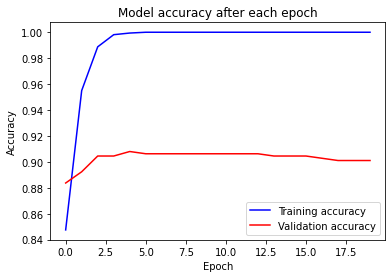

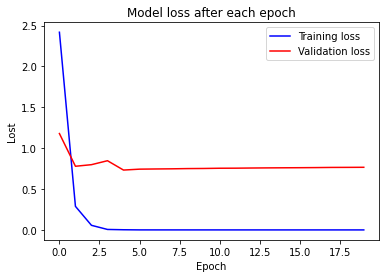

In [33]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# plt.ylim(ymin=0.5, ymax=1.025)
plt.title("Model accuracy after each epoch")
plt.plot(fitInfos.epoch, fitInfos.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fitInfos.epoch, fitInfos.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()

plt.xlabel("Epoch")
plt.ylabel("Lost")
plt.title("Model loss after each epoch")
plt.plot(fitInfos.epoch, fitInfos.history["loss"], color="blue", label="Training loss")
plt.plot(fitInfos.epoch, fitInfos.history["val_loss"], color="red", label="Validation loss")
plt.legend()
plt.show()


With the VGG16 model, we get way higher results than before with our own CNN. There is still some overfitting, but it is less important than before since now the training accuracy gets more acceptable, around 0.9 . VGG had the opportunity to train on a bigger dataset than us, with probably better hyperparameters, thus being more accurate than us while having been trained on a different (but not too much) dataset.


# Part 4

In [50]:
def kernel_image(weights, i, positive):
    # extract the convolutional kernel at position i
    k = weights[:, :, :, i].copy()
    if not positive:
        k = -k

    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m

    return k


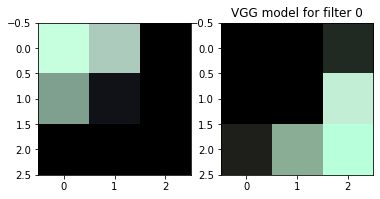

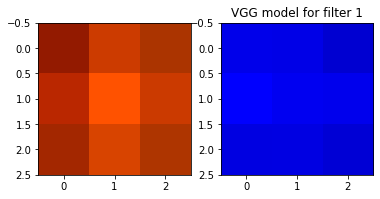

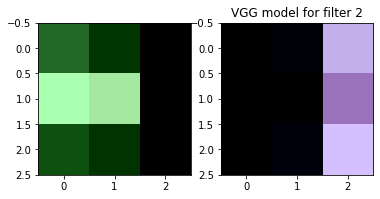

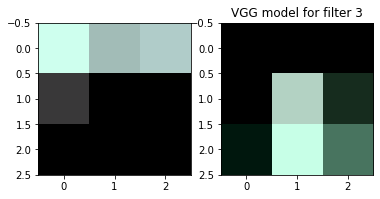

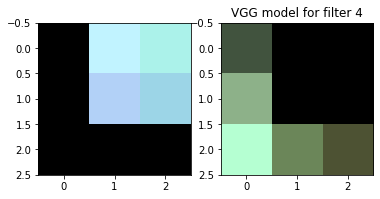

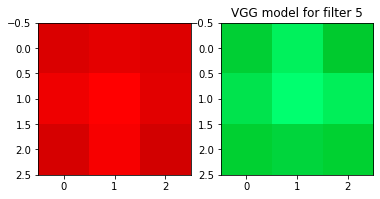

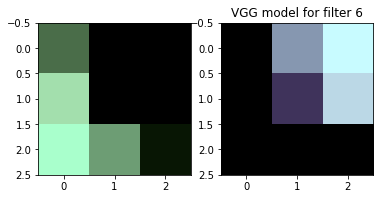

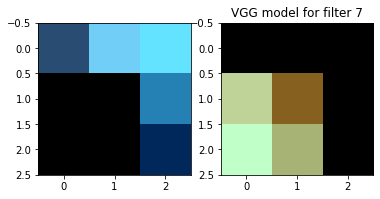

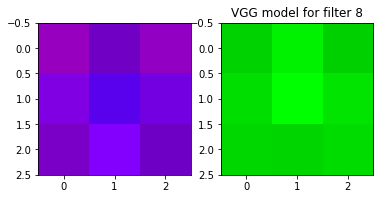

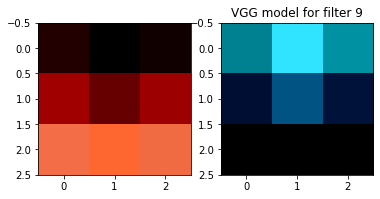

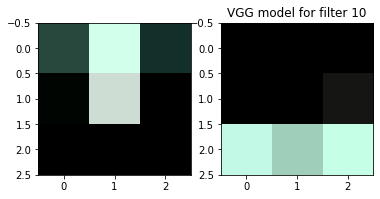

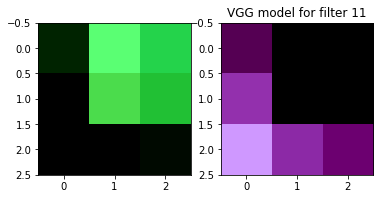

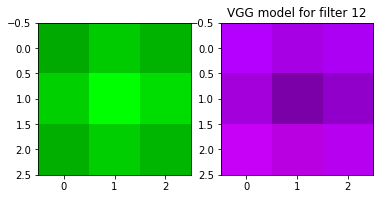

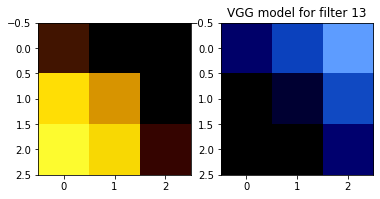

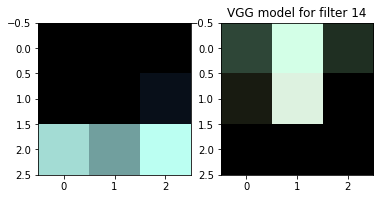

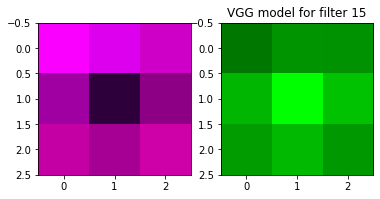

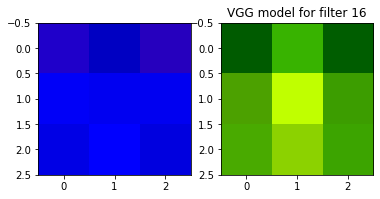

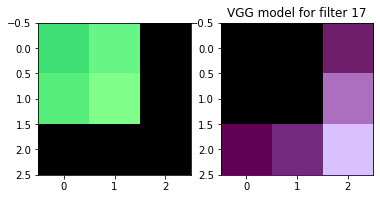

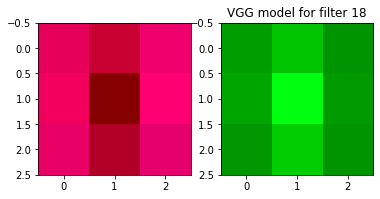

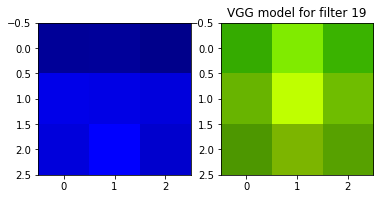

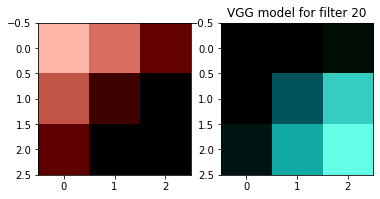

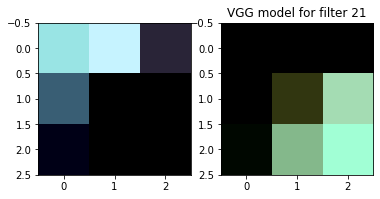

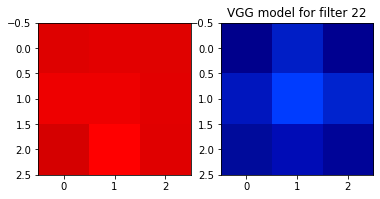

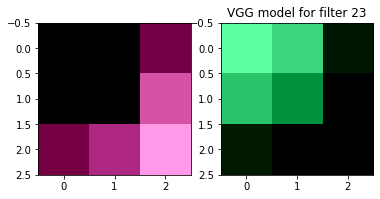

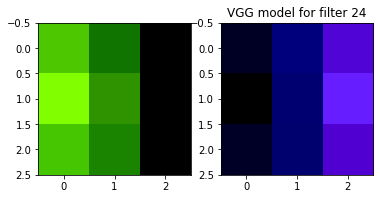

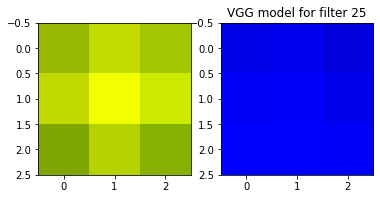

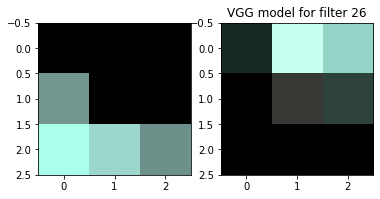

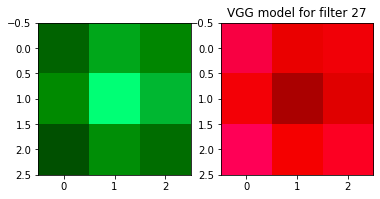

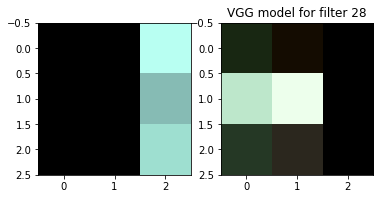

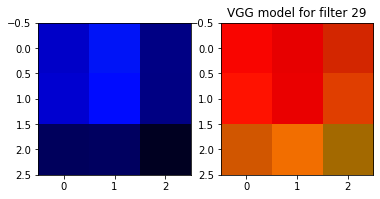

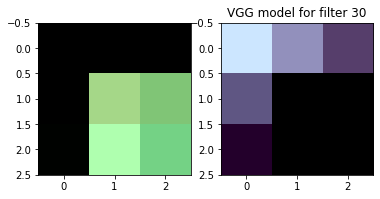

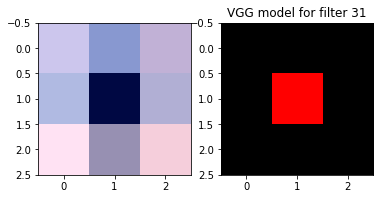

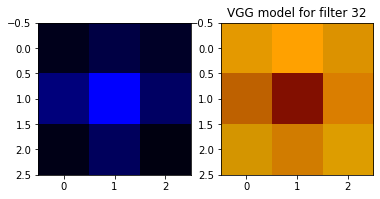

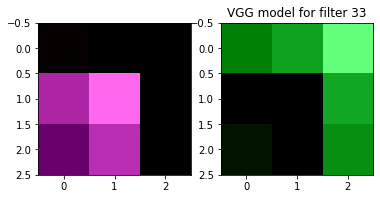

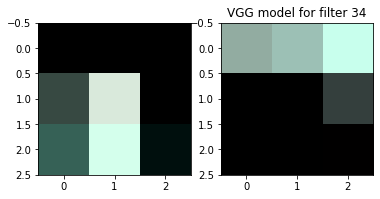

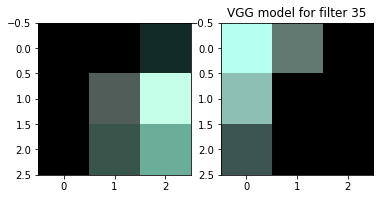

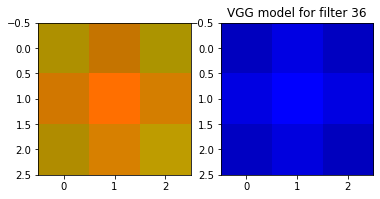

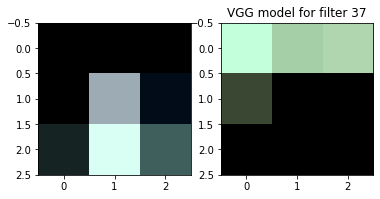

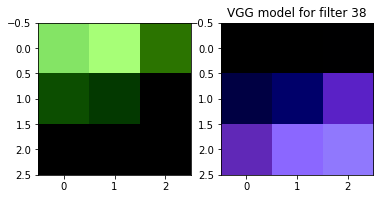

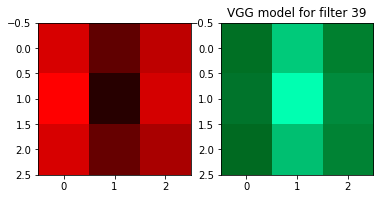

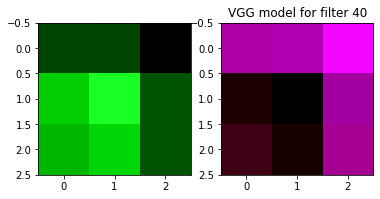

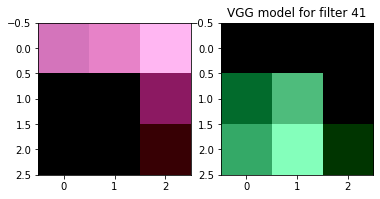

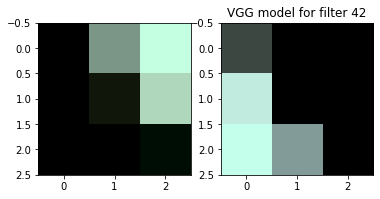

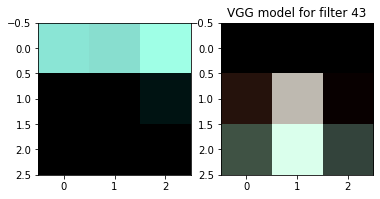

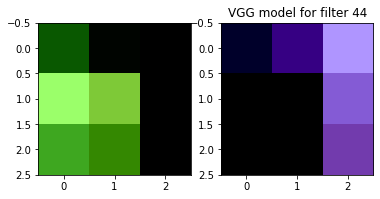

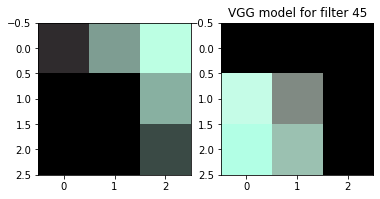

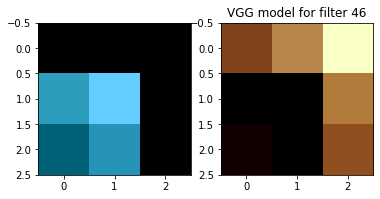

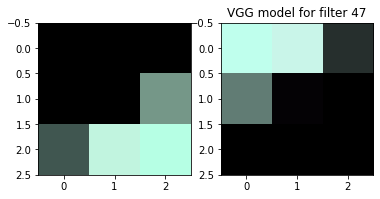

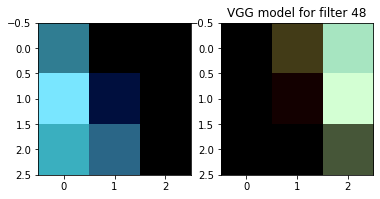

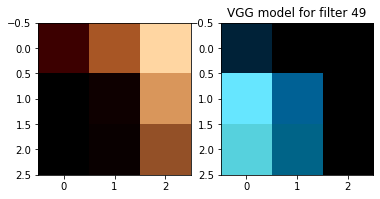

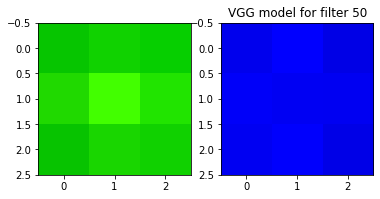

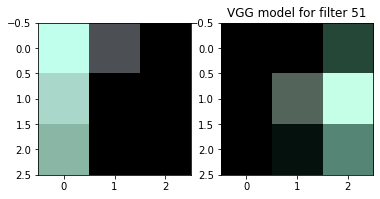

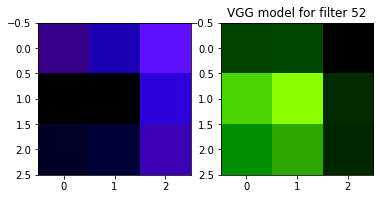

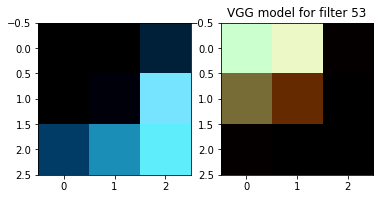

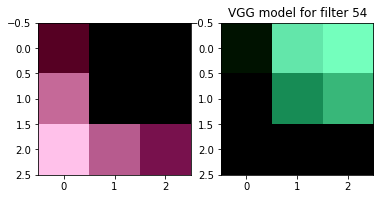

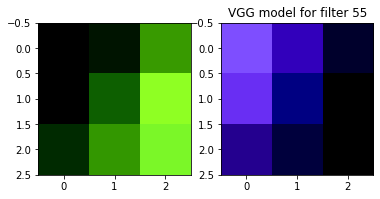

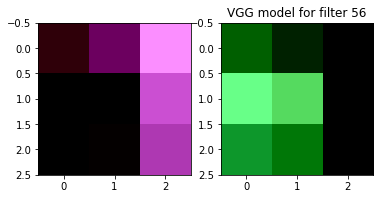

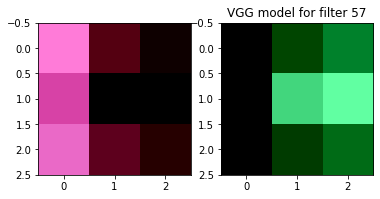

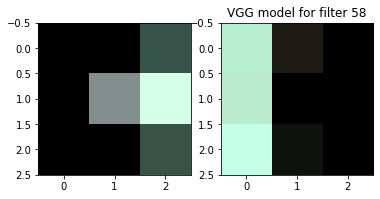

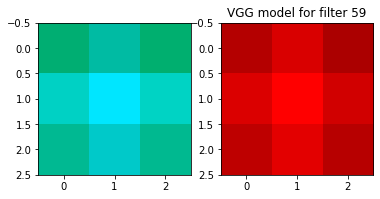

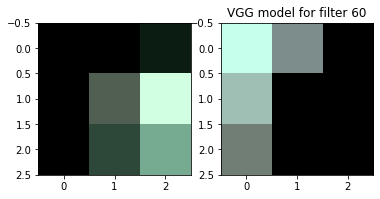

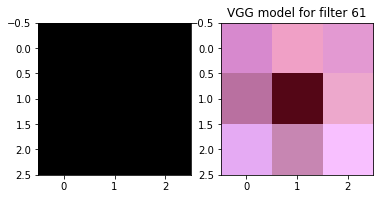

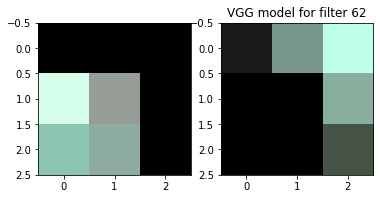

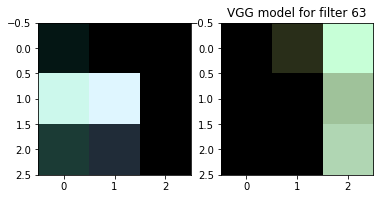

In [60]:
vggModel = applications.VGG16(weights="imagenet", include_top=True)

for i in range(64):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(kernel_image(vggModel.get_weights()[0], i, True))
    axarr[1].imshow(kernel_image(vggModel.get_weights()[0], i, False))
    plt.title(f"VGG model for filter {i}")
    plt.show()
